In [92]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from casadi import *
from casadi.tools import kron

In [93]:
v_in_1 = SX.sym('v_in_1')
v_in_2 = SX.sym('v_in_2')

cv_in_1 = np.array([[0.3],[.7]])
cv_in_2 = np.array([[0.25],[.25],[.25]])

vc_in = vertcat(v_in_1*cv_in_1, v_in_2*cv_in_2)

P = np.array([[1,0,1,1,0],[0,1,0,0,1]])

v_out_1 = SX.sym('v_out_1')
v_out_2 = SX.sym('v_out_2')

v_out = vertcat(v_out_1, v_out_2)

cv_out_1 = SX.sym('cv_out_1',5,1)
cv_out_2 = SX.sym('cv_out_2',5,1)

s = SX.sym('s',2,1)

In [94]:
ddt_s = P@vc_in-v_out

ddt_cv_out_1 = 1/s[0]*(P[0,:].T*vc_in-cv_out_1*(v_out_1+ddt_s[0]))
ddt_cv_out_2 = 1/s[1]*(P[1,:].T*vc_in-cv_out_2*(v_out_2+ddt_s[1]))

In [95]:
dae = {'x':vertcat(s,cv_out_1,cv_out_2),
       'ode':vertcat(ddt_s,ddt_cv_out_1,ddt_cv_out_2),
       'p':vertcat(v_in_1,v_in_2,v_out_1,v_out_2)}
F = integrator('F','idas',dae)

In [96]:
v_in_num_1 = np.ones((1,1))
v_in_num_2 = np.ones((1,1))
v_out_num_1 = 5*np.ones((1,1))
v_out_num_2 = 0.5*np.ones((1,1))
p = np.concatenate((v_in_num_1,v_in_num_2,v_out_num_1,v_out_num_2),axis=0)

x = [0.1*np.ones((12,1))]
t = 0
dt = 0.1
t_max = 10
t = np.arange(0,t_max,dt)

for i,t_i in enumerate(t):
    x.append(F(x0=x[i],p=p)['xf'].full())
    
x=np.concatenate(x,axis=1)

<IPython.core.display.Javascript object>


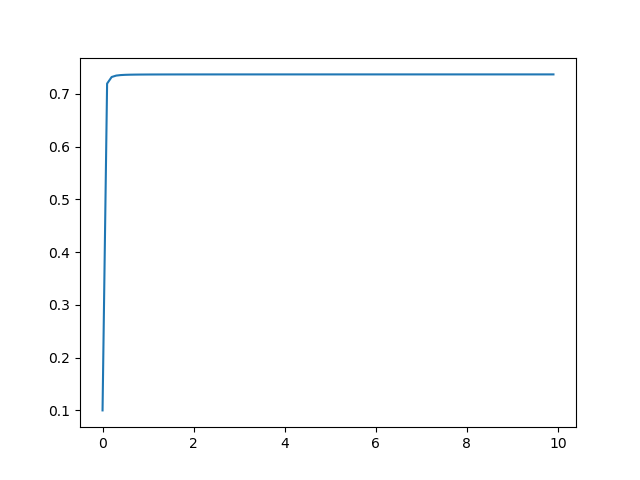

In [97]:


plt.plot(t,x[8,:-1])
plt.show()

SX([v_out_1, v_out_2])

In [130]:
((P.T*vc_in).T-(v_out*horzcat(cv_out_1,cv_out_2).T))[1,:]

SX(@1=0.25, [[((0.3*v_in_1)-(v_out_1*cv_out_1_0)), (-(v_out_1*cv_out_1_1)), ((@1*v_in_2)-(v_out_1*cv_out_1_2)), ((@1*v_in_2)-(v_out_1*cv_out_1_3)), (-(v_out_1*cv_out_1_4))]])

In [131]:
(v_out*horzcat(cv_out_1,cv_out_2).T)


SX(
[[(v_out_1*cv_out_1_0), (v_out_1*cv_out_1_1), (v_out_1*cv_out_1_2), (v_out_1*cv_out_1_3), (v_out_1*cv_out_1_4)], 
 [(v_out_2*cv_out_2_0), (v_out_2*cv_out_2_1), (v_out_2*cv_out_2_2), (v_out_2*cv_out_2_3), (v_out_2*cv_out_2_4)]])

In [115]:
cv_out_1.shape

(5, 1)